# 1 Introduction:

According to the World Health Organization (WHO), "diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys, and nerves."

There are three types of diabetes: 

    - Type 1 diabetes: Once known as juvenile diabetes or insulin-dependent diabetes, it is a chronic condition in which the pancreas produces little or no insuline by itself.
    
    - Type 2 diabetes: The most common type, especially in adults. It occurs when the body doesn't make enough insulin or becomes resistent to it. The  prevalence of type 2 diabetes has risen dramatically in countries of all income levels over the past three decades.
    
    - Gestational diabetes: A temporary condition where the body becomes insulin-resistant during pregnancy. After delivery, the condition usually resolves, but there is a risk for both the mother and the child to develop type 2 diabetes in the future.


WHO states that "about 422 million people worldwide have diabetes, the majority living in low- and middle-income countries, and 1.5 million deaths are directly attributed to diabetes each year." The tendency is getting worse because both the number of cases and the prevalence of diabetes have been steadily increasing over the past few decades. So, it is urgent to take measures, yesterday!

## Risk factors for diabetes (Global report on diabetes, WHO, 2016)

    Physical inactivity
    Overweight/Obese
    Gender
    Age
    Smoking history
    Cardiovascular events
    Blood glucose levels

In general terms, these risk factors are related to the choosen dataset (100000 observations/rows and nine variables/columns), which are described below, according to their Kaggle description:

    gender: Gender refers to the biological sex of the indivudual, which can have an impact on their susceptibility to diabetes. There are three categories: female, male and other.

    age: Age is an important factor as diabetes is more commonly diagnosed in older adults. Age ranges from 0 to 80 in this dataset. 

    hipertension: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values of 0 or 1, where 0 indicates they don't have hypertension and for 1 means they have hypertension.

    heart_disease: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values of 0 and 1, where 0 indicates they don't have heart disease and 1 means they have heart disease.

    smoking_history: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes. In this dataset, we have six categories: not current, former, no info, current, never and ever.

    bmi: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in this dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.

    HbA1c_level: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Generally, an HbA1c level of more than 6.5% indicates diabetes.

    blood_glucose_level: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

    diabetes: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating de absence of diabetes.

I chose this subject to study because is very important to assess the relationship between all risk factors and help show how important it is to control them to prevent diabetes and change the prevalence curve of the disease. Furthermore, I want to assess if, in this dataset, gender and age play an important role for the presence or absence of the disease.

## In this context, I want to answer the following questions:

### Is gender a significant player in diabetes outcome?
### Is age a significant player in diabetes outcome?
### Do all the variables significantly influence diabetes outcomes?


# 2 Project Development


In [332]:
# Importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2.1 Loading data and general dataset overview

In [335]:
# Loading the dataset:

diabetes = pd.read_csv('diabetes_prediction_dataset.csv')

In [337]:
# Displaying the first few rows of the dataset:
print(diabetes.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [339]:
# Getting a summary of the datase:
print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [341]:
# Checking for missing values:
print(diabetes.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [343]:
# Checking for variable types:
print(diabetes.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [345]:
# checking for general statistics:
print(diabetes.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

##### Data first impressions:

At first glance, I can observe that this dataset has 100000 observations/rows and 9 variables/columns. There are no null values for any variable, which can be confirmed by using .info() and .isnull().sum() methods. I can also see that gender and smoking_history have a data type of 'object', age, bmi and HbAic_level have a data type of 'float64', and hypertension, heart_disease, blood_glucose_level and diabetes have a data type of 'int64'. Furthermore, I will change the data type of gender and smoking_history to 'category' for further processing.
Taking into account the results of the .describe() method, I can observe that gender and smoking_history are not shown in the table, probably due to their data type (object = categorical). I can also observe the following: 

    - The minimum and maximum ages in the records are 0.08 and 80.00 years, respectively, and the mean age is approximately 41.9 years. The median age is 43.00 years. Based on this information, I expect the age distribution to be almost symmetric.

    - hypertension, heart_disease and diabetes are binary features (0 or 1's). Analysing their initial statistics could lead to errors if we are not cautious.

    - The minimum and maximum BMI values are 10.01 and 95.69, respectively, and the mean value is approximately 27.32. The median is 27.32, and despite both values (mean and median) are the same, it is too early to conclude about it's symmetry.

    - The minimum and maximum values of the HbA1c_level variable are 3.5% and 9.0%, respectively, and the mean value is approximately of 5.53%, which is below the threshold of 6.5%. The median is 5.80%, and based on this information, I suspect that the distribution is slightly left-skewed.

    - The minimum and maximum values for blood_glucose_level variable are 80.00 and 300.00, respectively. The mean value is aproximately 138.06 and the median is 140.00. Again I suspect that the distribution is slightly left_skewed based on both values (mean and median).


## 2.2 Preparing data for analysis

In [349]:
# Converting object dtype to category dtype
diabetes['gender'] = diabetes['gender'].astype('category')
diabetes['smoking_history'] = diabetes['smoking_history'].astype('category')

# Verifying the changes
print(diabetes.dtypes)

gender                 category
age                     float64
hypertension              int64
heart_disease             int64
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
dtype: object


In [351]:
# Counting gender categories
gender_unique = diabetes['gender'].value_counts()
print(gender_unique)

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [353]:
# Counting smoking history categories
smoking_hist_unique = diabetes['smoking_history'].value_counts()
print(smoking_hist_unique)

# sorting the categories in ascending order
sorted_smoking_unique = smoking_hist_unique.sort_values(ascending=True)
print(sorted_smoking_unique)

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
smoking_history
ever            4004
not current     6447
current         9286
former          9352
never          35095
No Info        35816
Name: count, dtype: int64


## 2.3 Visualizing variable distributions

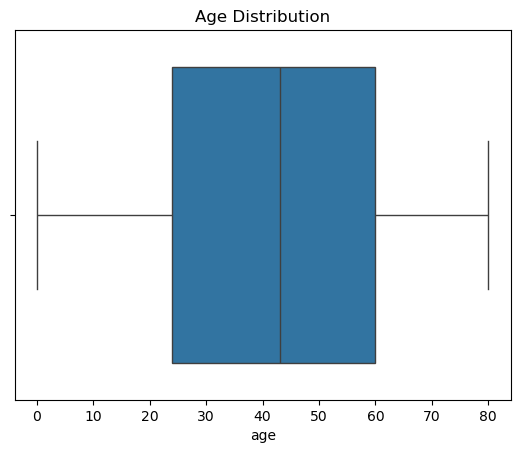

In [356]:
# Age boxplot:
sns.boxplot(x='age', data=diabetes) 
plt.title('Age Distribution') 
plt.show()

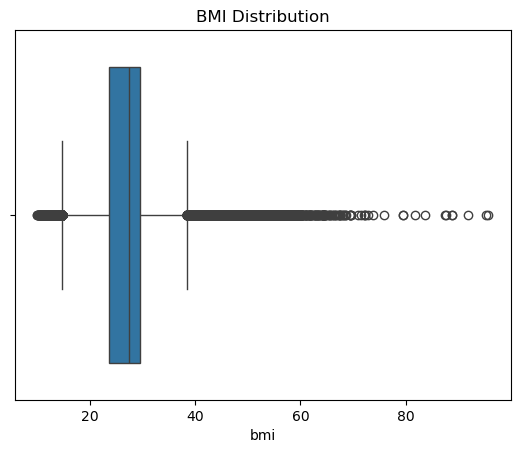

In [357]:
# BMI boxplot:
sns.boxplot(x='bmi', data=diabetes) 
plt.title('BMI Distribution') 
plt.show()

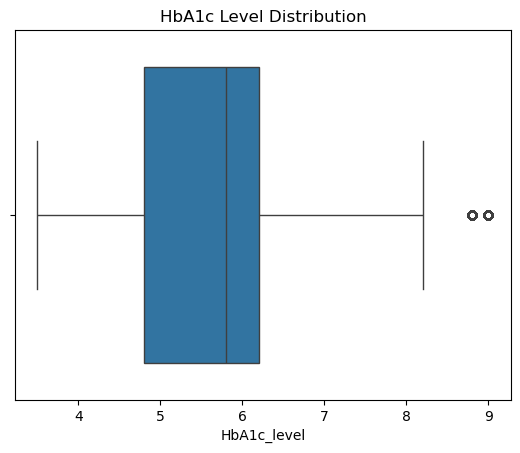

In [359]:
# HbA1c_level boxplot:
sns.boxplot(x='HbA1c_level', data=diabetes) 
plt.title('HbA1c Level Distribution') 
plt.show()

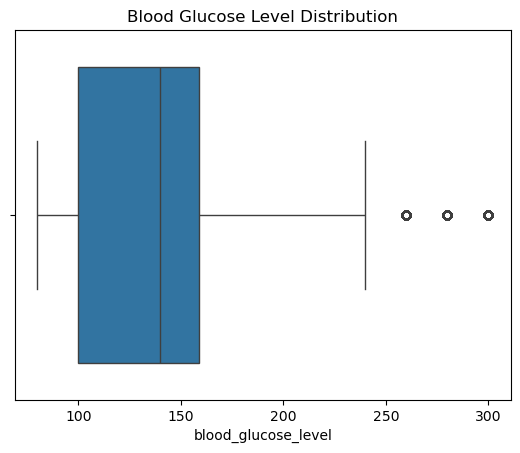

In [361]:
# Blood glucose level boxplot:
sns.boxplot(x='blood_glucose_level', data=diabetes) 
plt.title('Blood Glucose Level Distribution') 
plt.show()

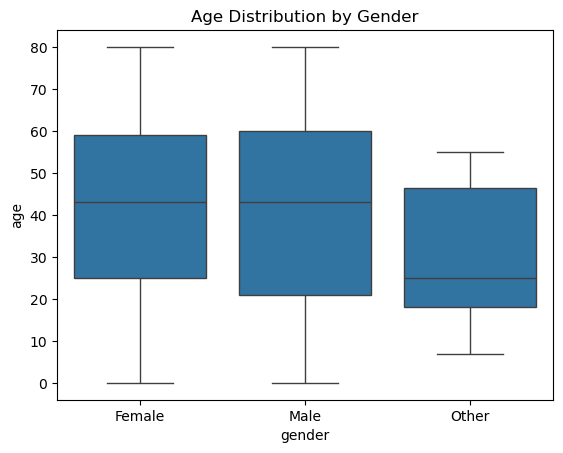

In [363]:
# Gender boxplot:
sns.boxplot(x='gender', y='age', data=diabetes) 
plt.title('Age Distribution by Gender') 
plt.show()

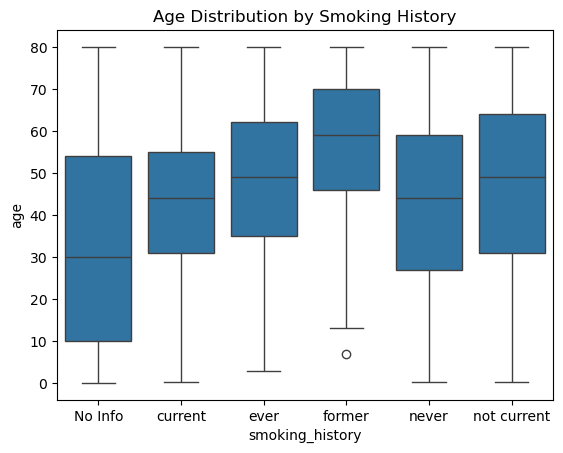

In [364]:
# Smoking history boxplot:
sns.boxplot(x='smoking_history', y='age', data=diabetes) 
plt.title('Age Distribution by Smoking History') 
plt.show()

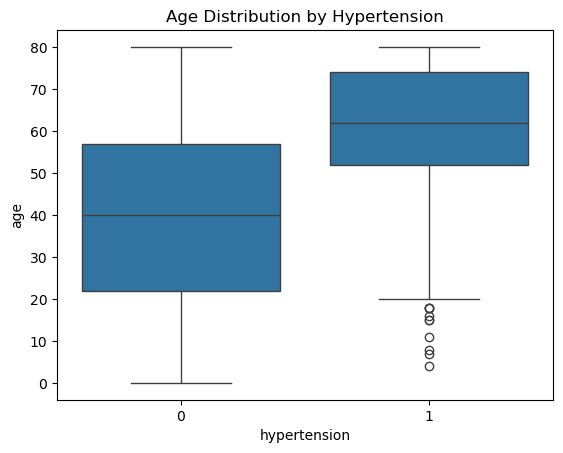

In [366]:
# Hypertension boxplot:
sns.boxplot(x='hypertension', y='age', data=diabetes) 
plt.title('Age Distribution by Hypertension') 
plt.show()

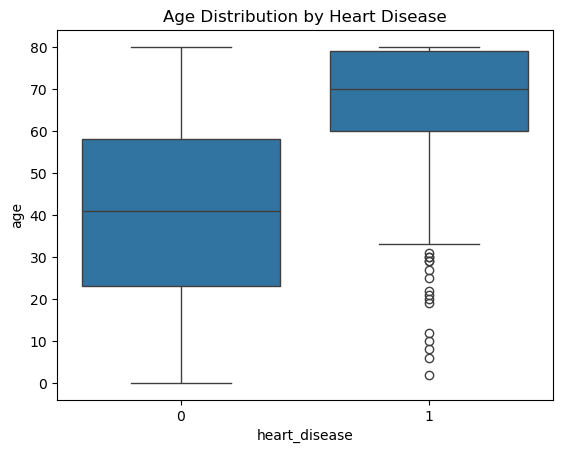

In [368]:
# Heart disease boxplot:
sns.boxplot(x='heart_disease', y='age', data=diabetes) 
plt.title('Age Distribution by Heart Disease') 
plt.show()

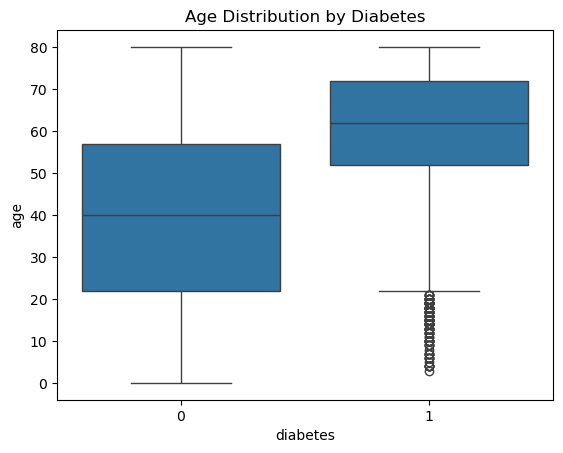

In [369]:
# Diabetes boxplot:
sns.boxplot(x='diabetes', y='age', data=diabetes) 
plt.title('Age Distribution by Diabetes') 
plt.show()

# Bibliography

Diabetes prediction dataset - available at: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset, Mohammed Mustafa, downloaded at 09 of November of 2024. 

GLOBAL REPORT 
ON DIABETES - World Health Organization, UN, WHO Library Cataloguing-in-Publication Data, 2016, available at: https://iris.who.int/bitstream/handle/10665/204871/9789241565257_eng.pdf, consulted at 10 of November of 2024.

Use of Glycated Haemoglobin (HbA1c) in the Diagnosis of Diabetes Mellitus - Abbreviated Report of a WHO Consultation - © World Health Organization 2011, available at: https://iris.who.int/bitstream/handle/10665/70523/WHO_NMH_CHP_CPM_11.1_eng.pdf, consulted at 10 of November of 2024.